## Example:1 ML classification (Cats and Dogs Images)

In [1]:
from selenium.webdriver import Chrome
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import pandas as pd
import time
import os

In [4]:
s = Service('/Users/ASCC/chromedriver-win64/chromedriver.exe')
myOptions = Options()
#myOptions.add_argument('--headless') #FOR RUNNING IN BACKGROUND
driver = Chrome(service=s, options = myOptions)
driver.maximize_window()
driver.get('https://google.com')

#LOCATE SEARCH BAR AND ENTER SEARCH STRING
driver.implicitly_wait(30)
searchTbox = driver.find_element(By.CSS_SELECTOR, '#APjFqb')
searchTbox.send_keys("Cat")

#PRESS ENTER
time.sleep(2)
searchTbox.send_keys(Keys.ENTER)

#LOCATE IMAGES TAB AND CLICK IT TO LOAD
driver.implicitly_wait(30)
img_tab = driver.find_element(By.XPATH, '//*[@id="bqHHPb"]/div/div/div[1]/a[1]/div')
img_tab.click()

C:\Users\ASCC\AppData\Local\Temp\ipykernel_11632\752559605.py:3: DeprecationWarning: headless property is deprecated, instead use add_argument('--headless') or add_argument('--headless=new')
  myOptions.headless = False


#### Need to Self scroll the page Now

In [5]:
last_height = driver.execute_script("return document.body.scrollHeight")
while True:
    driver.execute_script('window.scrollTo(0, document.body.scrollHeight)')
    time.sleep(4)
    new_height = driver.execute_script("return document.body.scrollHeight")
    if (new_height == last_height):
        break
    last_height = new_height
    
print("reached end of page")

reached end of page


#### Save Images

In [7]:
for i in range(1, 41):
    try:
        WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH, '//*[@id="islrg"]/div[1]/div['+str(i)+']/a[1]/div[1]/img')))
        cat_img = driver.find_element(By.XPATH, '//*[@id="islrg"]/div[1]/div['+str(i)+']/a[1]/div[1]/img')
        cat_img.screenshot('catImages/cat_img_'+str(i)+'.png')
    except:
        continue
        
print("Done.... Check the folder")

Done.... Check the folder


In [22]:
driver.quit()

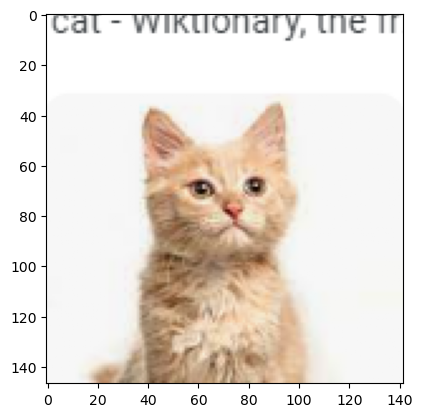

In [12]:
from matplotlib import image
from matplotlib import pyplot as plt
img = image.imread("catImages/cat_img_11.png")
plt.imshow(img);

## Example:2 Comments from Youtube Video

In [23]:
s = Service('/Users/ASCC/chromedriver-win64/chromedriver.exe')
myOptions = Options()
#myOptions.add_argument('--headless')
driver = Chrome(service=s, options = myOptions)
driver.maximize_window()
time.sleep(2)
driver.get('https://www.youtube.com/watch?v=fwq5317hDLQ')
driver.implicitly_wait(30)
#play = driver.find_element(By.XPATH, '//*[@id="movie_player"]/div[31]/div[2]/div[1]/button')
#play.click()

#PERFORM THREE SCROLLS TO GET 60 COMMENTS
for i in range(1,4):
    body = WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.TAG_NAME, 'body')))
    body.send_keys(Keys.END)
    time.sleep(12)
    
    
#SCRAP COMMENTS
comments = []
comments_list = driver.find_elements(By.CSS_SELECTOR, '#content-text')
for comment in comments_list:
    text = comment.text.strip()
    comments.append(text)
    
    
#AUTHORS OF COMMENTS
authors = []
author_list = driver.find_elements(By.ID, 'author-text')
for author in author_list:
    name = author.text.strip()
    authors.append(name)
    
    
#SAVE IN A CSV FILE
data = {'Author':authors,
       "Comment": comments}
df = pd.DataFrame(data, columns=["Author", "Comment"])
df.to_csv("Youtube_Comments.csv", index=False)
df = pd.read_csv("Youtube_Comments.csv")
df

,Author,Comment
0,@Cricketdani56,Asia Cup Most Wickets \n1st:Haris Rauf \n2nd:N...
1,@user-br6dd8mh4v,Most wickets in Asia Cup 2023\n\n1) Haris Rauf...
2,@bismanasir9033,I'm from Pakistan but I also like Bangladesh a...
3,@extendedexcellence,Respect button for Babar Azam
4,@ibneriyasat8147,respect botton for Pakistani bowlers
5,@waqarmedia5616,️ Beat Nepal by 238 runs.\n️ Points shared vs ...
6,@AnamKarim-hc7dd,Insha'Allah Pakistan will always win under the...
7,@rajajamshaid7164,From 9th position to 1st and 18th win in last ...
8,@afrozasadiq2598,Respect button for Pak bowlers....🇵🇰
9,@aglove4u1,As a Indian🇮🇳 we also appreciated pak bowling...


In [24]:
driver.quit()

## Example:3 Scrapping Jobs

In [20]:
s = Service('/Users/ASCC/chromedriver-win64/chromedriver.exe')
driver = Chrome(service=s)
driver.maximize_window()
driver.get('https://pk.indeed.com/')
time.sleep(5)

what_btn = driver.find_element(By.XPATH, '//*[@id="text-input-what"]')
where_btn = driver.find_element(By.XPATH, '//*[@id="text-input-where"]')
find_btn = driver.find_element(By.XPATH, '//*[@id="jobsearch"]/button')
what_btn.send_keys("Full Stack Web Developer")
where_btn.send_keys("Lahore")
find_btn.click()
time.sleep(5)

jobtitles = []
companies = []
salaries = []
def Jobs():
    time.sleep(2)
    postings = driver.find_elements(By.CSS_SELECTOR, '.resultContent')
    for post in postings:
        try:
            job_title = post.find_element(By.CSS_SELECTOR, 'h2 a').text
        except:
            job_title = 'No Job Title'
        try:
            company = post.find_element(By.CSS_SELECTOR, '.companyName').text
        except:
            company = "No Company Name"
        try:
            salary = post.find_element(By.CSS_SELECTOR, '.salary-snippet-container').text
        except:
            salary = "Salary Not Provided"
        jobtitles.append(job_title)
        companies.append(company)
        salaries.append(salary)
        
while(True):
    time.sleep(4)
    try:
        pop_up = driver.find_element(By.XPATH, '//*[@id="mosaic-desktopserpjapopup"]')
        driver.find_element(By.XPATH, '//*[@id="mosaic-desktopserpjapopup"]/div[1]/button').click()
    except:
        pass
    Jobs()
    try:
        driver.find_element(By.XPATH, '//*[@id="jobsearch-JapanPage"]/div/div/div[5]/div[1]/nav')
        driver.execute_script("arguments[0].scrollIntoView();", driver.find_element(By.XPATH, '//*[@id="jobsearch-JapanPage"]/div/div/div[5]/div[1]/nav'))
        try:
            driver.find_element(By.XPATH, '//*[@id="jobsearch-JapanPage"]/div/div/div[5]/div[1]/nav/div[6]/a').click()
        except:
            break
    except:
        break

        
#SAVE IN A CSV FILE
data = {'Job Title':jobtitles,
       "Company": companies,
       "Salary": salaries}
df = pd.DataFrame(data, columns=["Job Title", "Company", 'Salary'])
df.to_csv("Jobs.csv", index=False)
df = pd.read_csv("Jobs.csv")
df

,Job Title,Company,Salary
0,Full Stack Developer - Remote,My Anime For Life,"Rs 40,000 - Rs 50,000 a month"
1,Full Stack Developer,CDOXS,Salary Not Provided
2,Full Stack Developer,Xavor Corporation,Salary Not Provided
3,Front End Developer,Sharp Brains,"Rs 70,000 - Rs 80,000 a month"
4,Front End Word press Developer,DM Flows,Salary Not Provided
...,...,...,...
76,Mern developer,Emploiscareer,Salary Not Provided
77,Lead Mean Stake Developer,Aspire HR Private Limited,Salary Not Provided
78,Senior Software Developer Team Lead,Contour Software,Salary Not Provided
79,Lead Backend Engineer (PHP),Jeeny,Salary Not Provided


In [21]:
driver.quit()

## Example:4 Twitter

In [22]:
s = Service('/Users/ASCC/chromedriver-win64/chromedriver.exe')
driver = Chrome(service=s)
driver.maximize_window()
driver.get('https://twitter.com/login')
driver.implicitly_wait(30)

time.sleep(5)
username = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//input[@name="text"]')))
username.send_keys("mAiDabUtt6")
username.send_keys(Keys.ENTER)
time.sleep(5)
password = WebDriverWait(driver, 10).until(EC.visibility_of_element_located((By.XPATH, '//input[@name="password"]')))
password.send_keys(os.environ["mytwitterpassword"])
password.send_keys(Keys.ENTER)


time.sleep(3)
search_input = WebDriverWait(driver, 10).until(EC.visibility_of_element_located((By.XPATH, '//input[@placeholder="Search"]')))
search_input.send_keys("Babar Azam")
time.sleep(2)
search_input.send_keys(Keys.ENTER)


time.sleep(2)
people = WebDriverWait(driver, 10).until(EC.visibility_of_element_located((By.LINK_TEXT, 'People')))
people.click()

time.sleep(2)
click_babar = WebDriverWait(driver, 10).until(EC.visibility_of_element_located((By.LINK_TEXT, 'Babar Azam')))
click_babar.click()

In [23]:
#SCRAPPING
user_name = driver.find_element(By.XPATH, '//*[@id="react-root"]/div/div/div[2]/main/div/div/div/div/div/div[3]/div/div/div/div/div[2]/div[1]/div/div[2]/div/div/div/span').text
articles = []
tweets = []
times = []
while True:
    time.sleep(1)
    article = driver.find_elements(By.TAG_NAME, 'article')
    for a in article:
        if a not in articles:
            tweet = a.find_element(By.XPATH, './/*[@data-testid="tweetText"]')
            articles.append(a)
            t = a.find_element(By.XPATH, './/time')
            times.append(t.text)
            tweets.append(tweet.text)
    if len(articles) >= 25:
        break
    driver.execute_script("window.scrollBy(0,500);")
            
#SAVE IN A CSV FILE
data = {'User Name':user_name,
       "Times": times,
       "Tweets": tweets}
df = pd.DataFrame(data, columns=["User Name", "Times", 'Tweets'])
df.to_csv("tweets.csv", index=False)
df = pd.read_csv("tweets.csv")
df

,User Name,Times,Tweets
0,@babarazam258,Sep 6,Complete team performance which I hope the hou...
1,@babarazam258,Sep 3,Family
2,@babarazam258,Sep 2,Bowlers putting in such performance is a confi...
3,@babarazam258,Aug 28,Made a new friend yesterday
4,@babarazam258,Aug 27,I never had any doubt about it with my team. A...
5,@babarazam258,Aug 25,What a win. Wow!\n@iNaseemShah\n got some nerv...
6,@babarazam258,Aug 23,Key innings from \n@ImamUlHaq12\n and a brilli...
7,@babarazam258,Aug 17,Just another way to make your off-day productive
8,@babarazam258,Aug 16,Happy Retirement \n@WahabViki\n Bhai.\n\nYou a...
9,@babarazam258,Aug 15,The earth-shattering news of Kaptaan Babar Aza...


In [35]:
driver.quit() 

## Example:5 News Articles

In [36]:
s = Service('/Users/ASCC/chromedriver-win64/chromedriver.exe')
driver = Chrome(service=s)
driver.maximize_window()
driver.get('https://www.thenews.com.pk/today')
driver.implicitly_wait(30)

urls = []
try:
    s =  WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.PARTIAL_LINK_TEXT, 'education')))
    search_urls = driver.find_elements(By.PARTIAL_LINK_TEXT, 'education')
    for i in search_urls:
        urls.append(i.get_attribute('href'))
except:
    print("I did not Find any!")

    
original_window = driver.current_window_handle
news_articles =[]
authors = []
headlines = []
for url in urls:
    driver.switch_to.new_window('tab')
    driver.get(url)
    try:
        headline = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, 'h1')))
        author = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, '.category-source')))
        news = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, '.story-detail')))
        news_articles.append(news.text)
        authors.append(author.text)
        headlines.append(headline.text)
    except:
        pass
    driver.switch_to.window(original_window)


#SAVE IN A CSV FILE
data = {'Author':authors,
       "Headline": headlines,
       "Article": news_articles}
df = pd.DataFrame(data, columns=["Author", "Headline", 'Article'])
df.to_csv("News.csv", index=False)
df = pd.read_csv("News.csv")
df

,Author,Headline,Article
0,By Our Correspondent,LCWU-UK varsities accord to revolutionise high...,LAHORE:In a historic event held at Lahore Coll...
1,By Our Correspondent,World Literacy Day highlights importance of ed...,LAHORE:Secretary Literacy Syed Haider Iqbal an...


In [37]:
driver.quit()